In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%pip install gradio

Active code page: 1252
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pycaret

Active code page: 1252
Note: you may need to restart the kernel to use updated packages.


In [4]:
test = pd.read_csv('C:/Users/Tommy/notebook/test.csv')
train = pd.read_csv('C:/Users/Tommy/notebook/train.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
from pycaret.regression import*

In [8]:
s = setup(train, target = "SalePrice",use_gpu=True)

,Description,Value
0,session_id,8320
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 399)"


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8320, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
best = compare_models(n_select=3,sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16386.9175,623723752.0710,24413.7125,0.8984,0.1346,0.0980,0.6450
ridge,Ridge Regression,17213.6062,683028633.8381,25732.4705,0.8882,0.1551,0.1053,0.0860
omp,Orthogonal Matching Pursuit,17077.5970,682028192.9626,25800.8464,0.8883,0.1386,0.1004,0.0160
lightgbm,Light Gradient Boosting Machine,17172.2008,799114950.7036,27630.7628,0.8730,0.1426,0.1007,0.6650
rf,Random Forest Regressor,18075.5286,816848563.3758,27741.4666,0.8731,0.1508,0.1088,0.7860
en,Elastic Net,19663.1618,894633801.7540,29353.9424,0.8583,0.1644,0.1200,0.1600
lr,Linear Regression,19987.0981,919620598.5632,29685.2214,0.8490,0.1978,0.1265,0.0990
lasso,Lasso Regression,19165.1177,950256607.0382,29849.7654,0.8440,0.2045,0.1178,0.1000
et,Extra Trees Regressor,20641.7308,1099452861.2245,32193.7402,0.8274,0.1683,0.1219,0.8170
br,Bayesian Ridge,23417.9171,1217913982.4923,34304.6847,0.8059,0.2032,0.1424,0.2270


In [33]:
tuned_gbr = tune_model(best[0], optimize='RMSE',fold=10,n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20429.1887,1281234031.2005,35794.3296,0.8537,0.1387,0.1023
1,15321.9478,523532721.8576,22880.8374,0.8939,0.1487,0.1046
2,16555.1300,660859717.8075,25707.1919,0.9153,0.1698,0.1144
3,12015.3994,259133362.4485,16097.6198,0.9367,0.1341,0.0885
4,15918.5811,605586234.1091,24608.6618,0.9277,0.1206,0.0907
5,13661.8236,360832931.8167,18995.6030,0.9009,0.1161,0.0825
6,17486.2796,1086070947.3403,32955.5905,0.8557,0.1248,0.0856
7,14223.6582,435562668.6283,20870.1382,0.9235,0.1267,0.0903
8,17764.7621,624509315.3552,24990.1844,0.8737,0.1383,0.1023


In [28]:
tuned_ridge = tune_model(best[1], fold=10, n_iter=100, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18326.4326,906674848.9096,30111.0420,0.8965,0.1326,0.0967
1,14768.6158,475568320.6360,21807.5290,0.9036,0.1360,0.0986
2,15226.6685,636776413.6772,25234.4291,0.9184,0.1465,0.1000
3,13649.2365,304702808.8157,17455.7386,0.9256,0.1528,0.1030
4,16794.7414,601443755.1840,24524.3502,0.9281,0.1260,0.0965
5,14932.7469,466372276.1454,21595.6541,0.8719,0.1287,0.0857
6,18068.4510,970978131.3110,31160.5220,0.8710,0.1282,0.0950
7,14267.4583,381705580.6483,19537.2869,0.9330,0.1450,0.0996
8,18705.8045,638384147.8027,25266.2650,0.8708,0.1477,0.1114


In [30]:
tuned_OMP = tune_model(best[2], fold=10, n_iter=100, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19044.5660,925503896.4787,30422.0955,0.8943,0.1426,0.0996
1,15668.3402,549335761.5611,23437.9129,0.8886,0.1566,0.1084
2,17001.6274,864409766.7118,29400.8464,0.8893,0.1832,0.1213
3,12865.2232,277412677.3764,16655.7101,0.9322,0.1433,0.0956
4,17426.4840,616347279.4237,24826.3424,0.9264,0.1302,0.0999
5,14582.0525,461131229.5823,21473.9663,0.8733,0.1231,0.0844
6,16686.3224,779166382.8719,27913.5520,0.8965,0.1187,0.0879
7,13853.3403,344561431.8287,18562.3660,0.9395,0.1392,0.0948
8,19893.5062,777313045.5826,27880.3344,0.8427,0.1634,0.1154


In [11]:
pred = predict_model(best, data = test)

In [20]:
pd.set_option('display.max_columns', None)

In [34]:
best_models = [tuned_gbr, tuned_ridge, tuned_OMP]

In [35]:
voting = blend_models(best_models, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18002.4289,953047455.7454,30871.4667,0.8912,0.1280,0.0910
1,13419.2450,415356875.3250,20380.3061,0.9158,0.1329,0.0908
2,15090.5504,630000435.8688,25099.8095,0.9193,0.1578,0.1030
3,11635.9469,221892554.2988,14896.0583,0.9458,0.1336,0.0882
4,15306.0991,537669222.4176,23187.6955,0.9358,0.1123,0.0853
5,12807.7680,360626788.3256,18990.1761,0.9009,0.1117,0.0742
6,15874.3162,879337632.1011,29653.6276,0.8831,0.1128,0.0797
7,12023.8446,315718317.5187,17768.4641,0.9446,0.1187,0.0802
8,16904.1117,549311497.0327,23437.3953,0.8889,0.1320,0.0963


In [36]:
blender = stack_models(estimator_list=best_models, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19073.7992,985954215.2989,31399.9079,0.8874,0.2250,0.1034
1,17447.5272,679942082.9399,26075.6991,0.8622,0.1545,0.1123
2,16897.2262,717485827.6112,26785.9259,0.9081,0.1553,0.1075
3,16411.7141,426288731.2957,20646.7608,0.8959,0.1657,0.1214
4,17373.9366,691426109.6285,26294.9826,0.9174,0.1443,0.0993
5,15423.5843,506707630.9502,22510.1673,0.8608,0.1286,0.0885
6,20580.1084,1109031632.2333,33302.1265,0.8526,0.1604,0.1126
7,14905.7174,433501340.8558,20820.6950,0.9239,0.1694,0.1062
8,19857.8436,782090601.4055,27965.8828,0.8418,0.1807,0.1244


In [38]:
model = voting
model

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.05,
                                                       loss='ls', max_depth=4,
                                                       max_features='log2',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.3,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=5,
                                                       min_weight_fraction_leaf=0.0,
                                

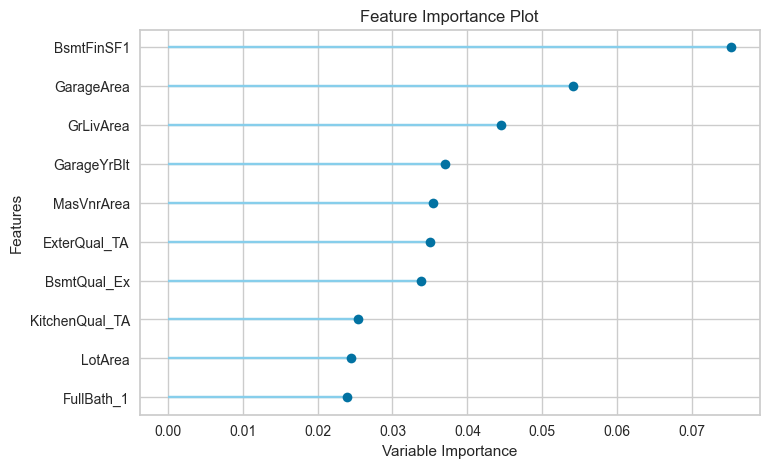

In [39]:
plot_model(best_models[0], 'feature')

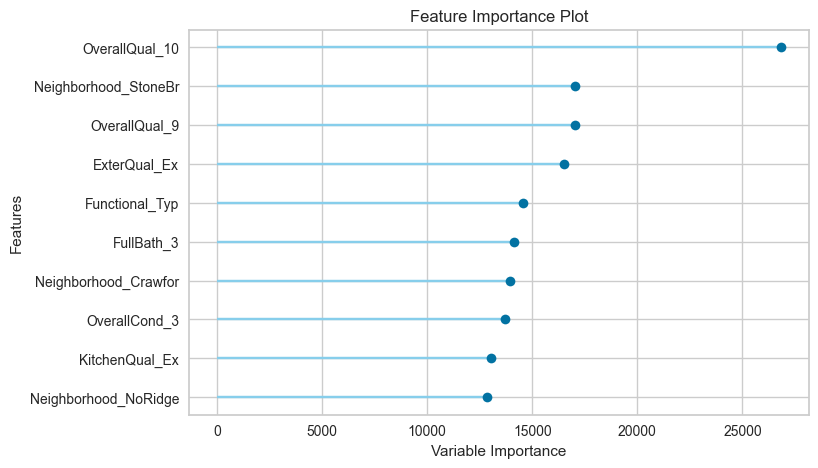

In [40]:
plot_model(best_models[1], 'feature')

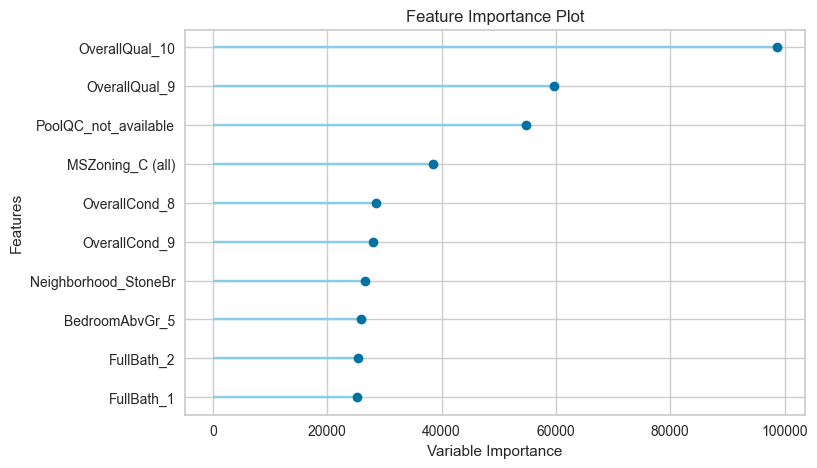

In [41]:
plot_model(best_models[2], 'feature')

In [42]:
pred = predict_model(model, data = test)

In [21]:
pred.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,130758.688333
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,171353.837728
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,188891.420856
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,183287.790001
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,183020.334132


In [44]:
final_model = finalize_model(model)

In [17]:
import pickle

In [18]:
pickle.dump(final_model, open('saved_model.pkl', 'wb'))

In [45]:
create_app(final_model)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1f93ea12848>, 'http://127.0.0.1:7862/', None)